In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

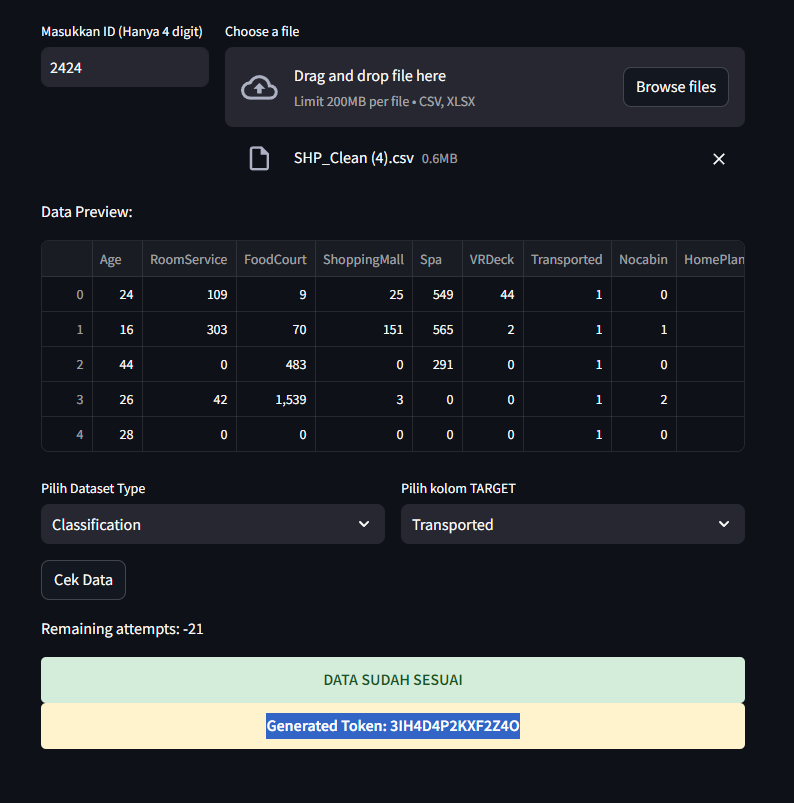

In [151]:
df = pd.read_csv('/content/SHP.csv')

In [152]:
df_copy = df.copy()

In [153]:
df.head()

Unnamed: 0 PassengerId HomePlanet CryoSleep  Cabin    Destination   Age  \
0           0     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0   
1           1     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0   
2           2     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0   
3           3     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0   
4           4     0006_02      Earth      True  G/0/S    TRAPPIST-1e  28.0   

     VIP RoomService FoodCourt ShoppingMall    Spa VRDeck                Name  \
0  False       109.0       9.0         25.0  549.0   44.0        Juanna Vines   
1  False       303.0      70.0        151.0  565.0    2.0   Willy Santantines   
2  False         0.0     483.0          0.0  291.0    0.0   Sandie Hinetthews   
3  False        42.0    1539.0          3.0    0.0    0.0  Billex Jacostaffey   
4  False         0.0       0.0          0.0    0.0    inf  Candra Jacostaffey   

   Transported  
0         True  
1         True  
2         True  
3         True  
4         True

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    12138 non-null  int64 
 1   PassengerId   12138 non-null  object
 2   HomePlanet    11985 non-null  object
 3   CryoSleep     11955 non-null  object
 4   Cabin         11982 non-null  object
 5   Destination   11981 non-null  object
 6   Age           11993 non-null  object
 7   VIP           11963 non-null  object
 8   RoomService   12002 non-null  object
 9   FoodCourt     11991 non-null  object
 10  ShoppingMall  11964 non-null  object
 11  Spa           11985 non-null  object
 12  VRDeck        11975 non-null  object
 13  Name          11973 non-null  object
 14  Transported   12138 non-null  bool  
dtypes: bool(1), int64(1), object(13)
memory usage: 1.3+ MB


In [155]:
def missing_data(df):
    total_missing = df.isnull().sum().sort_values(ascending = False)
    Percentage = (total_missing / len(df)) * 100
    summary_df = pd.concat([total_missing, Percentage], axis=1, keys=['Data Missing', 'Data Percentage Missing'])
    return summary_df

missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')

In [156]:
for col in df.columns:
    print(f"Nilai unik pada kolom '{col}':")
    print(df[col].nunique())
    print(df[col].unique())
    print()  # Tambahkan baris kosong untuk pemisah

Nilai unik pada kolom 'Unnamed: 0':
12138
[    0     1     2 ... 12135 12136 12137]

Nilai unik pada kolom 'PassengerId':
8693
['0002_01' '0004_01' '0005_01' ... '9276_01' '9278_01' '9280_01']

Nilai unik pada kolom 'HomePlanet':
6
['Earth' 'Europa' 'Mars' '-' nan 'inf' '-inf']

Nilai unik pada kolom 'CryoSleep':
5
['False' 'True' nan '-' 'inf' '-inf']

Nilai unik pada kolom 'Cabin':
6563
['F/0/S' 'F/1/S' 'F/0/P' ... 'F/1894/P' 'A/98/P' 'G/1499/S']

Nilai unik pada kolom 'Destination':
6
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan '-' '-inf' 'inf']

Nilai unik pada kolom 'Age':
83
['24.0' '16.0' '44.0' '26.0' '28.0' '35.0' '14.0' '34.0' '45.0' '32.0'
 '0.0' '10.0' '62.0' '47.0' '2.0' '20.0' '17.0' '4.0' '21.0' '19.0' '25.0'
 '38.0' '27.0' '15.0' '33.0' '18.0' '42.0' '8.0' '40.0' '3.0' '31.0' '9.0'
 '29.0' '48.0' '64.0' '13.0' '67.0' '22.0' '50.0' nan '57.0' '58.0' '37.0'
 '56.0' '1.0' '39.0' '52.0' 'inf' '51.0' '-inf' '11.0' '43.0' '46.0'
 '54.0' '60.0' '23.0' '49.0' '36.0' '61.0'

In [157]:
del df['PassengerId']
del df['Unnamed: 0']
del df['Name']

In [158]:
def ganti_nilai(kolom):
    return kolom.replace(['inf', '-inf', '-'], np.nan)

In [159]:
selected = df.columns
df[selected] = df[selected].apply(ganti_nilai)

In [160]:
for col in df.columns:
    print(f"Nilai unik pada kolom '{col}':")
    print(df[col].nunique())
    print(df[col].unique())
    print()  # Tambahkan baris kosong untuk pemisah

Nilai unik pada kolom 'HomePlanet':
3
['Earth' 'Europa' 'Mars' nan]

Nilai unik pada kolom 'CryoSleep':
2
['False' 'True' nan]

Nilai unik pada kolom 'Cabin':
6560
['F/0/S' 'F/1/S' 'F/0/P' ... 'F/1894/P' 'A/98/P' 'G/1499/S']

Nilai unik pada kolom 'Destination':
3
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]

Nilai unik pada kolom 'Age':
80
['24.0' '16.0' '44.0' '26.0' '28.0' '35.0' '14.0' '34.0' '45.0' '32.0'
 '0.0' '10.0' '62.0' '47.0' '2.0' '20.0' '17.0' '4.0' '21.0' '19.0' '25.0'
 '38.0' '27.0' '15.0' '33.0' '18.0' '42.0' '8.0' '40.0' '3.0' '31.0' '9.0'
 '29.0' '48.0' '64.0' '13.0' '67.0' '22.0' '50.0' nan '57.0' '58.0' '37.0'
 '56.0' '1.0' '39.0' '52.0' '51.0' '11.0' '43.0' '46.0' '54.0' '60.0'
 '23.0' '49.0' '36.0' '61.0' '68.0' '59.0' '74.0' '30.0' '12.0' '53.0'
 '55.0' '5.0' '7.0' '63.0' '71.0' '41.0' '6.0' '70.0' '65.0' '66.0' '69.0'
 '72.0' '77.0' '73.0' '75.0' '78.0' '76.0' '79.0']

Nilai unik pada kolom 'VIP':
2
['False' nan 'True']

Nilai unik pada kolom 'RoomService'

In [161]:
df[['CabinType', 'Nocabin', 'SizeCabin']] = df['Cabin'].str.split('/', expand=True)
del df['Cabin']

In [162]:
df.isna().sum()

HomePlanet      273
CryoSleep       282
Destination     265
Age             247
VIP             284
RoomService     234
FoodCourt       254
ShoppingMall    291
Spa             247
VRDeck          273
Transported       0
CabinType       274
Nocabin         274
SizeCabin       274
dtype: int64

In [163]:
df.head()

HomePlanet CryoSleep    Destination   Age    VIP RoomService FoodCourt  \
0      Earth     False    TRAPPIST-1e  24.0  False       109.0       9.0   
1      Earth     False    TRAPPIST-1e  16.0  False       303.0      70.0   
2      Earth     False  PSO J318.5-22  44.0  False         0.0     483.0   
3      Earth     False    TRAPPIST-1e  26.0  False        42.0    1539.0   
4      Earth      True    TRAPPIST-1e  28.0  False         0.0       0.0   

  ShoppingMall    Spa VRDeck  Transported CabinType Nocabin SizeCabin  
0         25.0  549.0   44.0         True         F       0         S  
1        151.0  565.0    2.0         True         F       1         S  
2          0.0  291.0    0.0         True         F       0         P  
3          3.0    0.0    0.0         True         F       2         S  
4          0.0    0.0    NaN         True         G       0         S

In [164]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'CabinType', 'Nocabin', 'SizeCabin'],
      dtype='object')

In [165]:
num_col = ['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Nocabin']
cat_col = [col for col in df.columns if col not in num_col]

cat_col

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Transported',
 'CabinType',
 'SizeCabin']

In [166]:
for col in num_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    11865 non-null  object 
 1   CryoSleep     11856 non-null  object 
 2   Destination   11873 non-null  object 
 3   Age           11891 non-null  float64
 4   VIP           11854 non-null  object 
 5   RoomService   11904 non-null  float64
 6   FoodCourt     11884 non-null  float64
 7   ShoppingMall  11847 non-null  float64
 8   Spa           11891 non-null  float64
 9   VRDeck        11865 non-null  float64
 10  Transported   12138 non-null  bool   
 11  CabinType     11864 non-null  object 
 12  Nocabin       11864 non-null  float64
 13  SizeCabin     11864 non-null  object 
dtypes: bool(1), float64(7), object(6)
memory usage: 1.2+ MB


In [168]:
for col in cat_col:
    modus = df[col].mode()[0]
    df[col].fillna(modus, inplace=True)

<ipython-input-169-d5e62a46539f>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


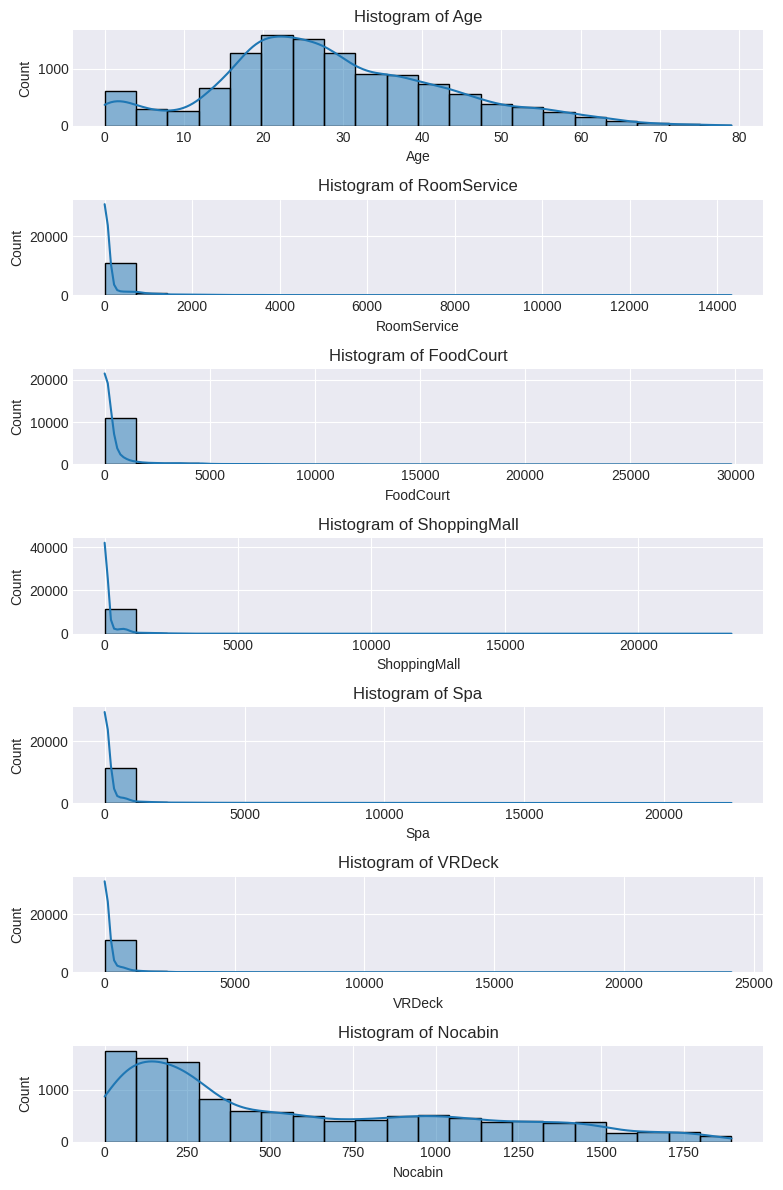

In [169]:
# Set up the plotting environment
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 12))

# Loop through the selected variables and create histograms and boxplots
for i, variable in enumerate(num_col):
    plt.subplot(len(num_col), 2, 2*i + 1)
    sns.histplot(df[variable].dropna(), kde=True, bins=20)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

In [170]:
num_col_selected = ['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in num_col_selected:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

In [171]:
df["Nocabin"].fillna(df["Nocabin"].mean(),inplace=True)
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12138 non-null  object 
 1   CryoSleep     12138 non-null  object 
 2   Destination   12138 non-null  object 
 3   Age           12138 non-null  float64
 4   VIP           12138 non-null  object 
 5   RoomService   12138 non-null  float64
 6   FoodCourt     12138 non-null  float64
 7   ShoppingMall  12138 non-null  float64
 8   Spa           12138 non-null  float64
 9   VRDeck        12138 non-null  float64
 10  Transported   12138 non-null  bool   
 11  CabinType     12138 non-null  object 
 12  Nocabin       12138 non-null  float64
 13  SizeCabin     12138 non-null  object 
dtypes: bool(1), float64(7), object(6)
memory usage: 1.2+ MB


In [173]:
cat_col_excluding_transported = [col for col in cat_col if col != 'Transported']
df = pd.get_dummies(df, columns=cat_col_excluding_transported)
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        12138 non-null  float64
 1   RoomService                12138 non-null  float64
 2   FoodCourt                  12138 non-null  float64
 3   ShoppingMall               12138 non-null  float64
 4   Spa                        12138 non-null  float64
 5   VRDeck                     12138 non-null  float64
 6   Transported                12138 non-null  int64  
 7   Nocabin                    12138 non-null  float64
 8   HomePlanet_Earth           12138 non-null  int64  
 9   HomePlanet_Europa          12138 non-null  int64  
 10  HomePlanet_Mars            12138 non-null  int64  
 11  CryoSleep_False            12138 non-null  int64  
 12  CryoSleep_True             12138 non-null  int64  
 13  Destination_55 Cancri e    12138 non-null  int

In [180]:
df.duplicated().sum()

3469

In [181]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [183]:
df.to_csv("SHP_Clean.csv", index=False)

# Trash

In [178]:
asd

NameError: name 'asd' is not defined

In [ ]:
df.info()

In [ ]:
df.info()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
def missing_data(df):
    total_missing = df.isnull().sum().sort_values(ascending = False)
    Percentage = (total_missing / len(df)) * 100
    summary_df = pd.concat([total_missing, Percentage], axis=1, keys=['Data Missing', 'Data Percentage Missing'])
    return summary_df

missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')

only 1% null values/columns

In [ ]:
df['RoomService'].value_counts()

In [ ]:
df['VRDeck'].value_counts()

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.drop(columns=['PassengerId'],inplace=True)
df.drop(columns=['Name'],inplace=True)

In [ ]:
df.head()

In [ ]:
df['ShoppingMall'].value_counts()

In [ ]:
# Mengganti nilai NaN, inf, -inf, dan '-' dengan NaN untuk pembersihan
df.replace(['-', 'inf', '-inf'], np.nan, inplace=True)

# Konversi kolom yang memiliki dtype object menjadi numeric
# errors='coerce' akan mengubah nilai yang tidak dapat dikonversi menjadi NaN
cols_to_convert = [ 'Age', 'RoomService', 'FoodCourt',
                   'ShoppingMall', 'Spa', 'VRDeck']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.info()

In [ ]:
df['ShoppingMall'].isnull().sum()

In [ ]:
df.info()

In [ ]:
missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')

In [ ]:
df = df.dropna()

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

In [ ]:
# Define the columns you want histograms for
columns_to_plot = ['ShoppingMall', 'Age', 'RoomService','FoodCourt','Spa','VRDeck' ]  # Replace with your actual column names

# Create a figure with subplots for each histogram
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))  # Adjust figsize as needed

# Loop through the columns and create histograms
for idx, col in enumerate(columns_to_plot):
    sns.histplot(data=df, x=col, bins=30, ax=axes[idx])  # Adjust the number of bins as needed
    axes[idx].set_title(col)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Adjust layout (optional)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
df['Age'].value_counts() # ada kakek kakek

In [ ]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Cabin','Destination','VIP']  # Replace with actual categorical columns

fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(15, 5))  # Adjust figsize

# Loop through the categorical columns and create bar plots
for idx, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Cabin','Destination','VIP']

In [ ]:
df['Cabin'].value_counts()

In [ ]:
df[['CabinType', 'Nocabin', 'SizeCabin']] = df['Cabin'].str.split('/', expand=True)

In [ ]:
df['Cabin'].unique()

In [ ]:
df['CabinType'].unique()

In [ ]:
df['SizeCabin'].unique()

In [ ]:
del df['Nocabin']
del df['Cabin']

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df['Destination'].unique()

In [ ]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'CabinType','Destination','VIP','SizeCabin']  # Replace with actual categorical columns

In [ ]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [ ]:
df_encoded.info()

In [ ]:
# Pilih kolom dengan tipe data bool
bool_cols = df_encoded.select_dtypes(include=['bool'])

# Ubah tipe data kolom-kolom Boolean menjadi integer
df_encoded[bool_cols.columns] = df_encoded[bool_cols.columns].astype(int)

In [ ]:
df_encoded.info()

In [ ]:
df_encoded.to_csv('SHP_Cleannnn.csv', index=False)

In [ ]:
df_encoded.head()

In [ ]:
df_encoded.duplicated().sum()

In [ ]:
df_encoded = df_encoded.drop_duplicates()
df_encoded.info()

In [ ]:
df_encoded['Age'] = df_encoded['Age'].astype(int)

In [ ]:
df_encoded.to_csv('SHP_Cleannnn.csv', index=False)

In [ ]:
asd



---



In [ ]:
# Seleksi huruf awal pada kolom 'Cabin' dan simpan dalam kolom baru 'Cabin_Initial'
df['Cabin_Initial'] = df['Cabin'].str[0]

# Tampilkan nilai-nilai pada kolom baru
print(df['Cabin_Initial'])

In [ ]:
df['Cabin'].value_counts()

In [ ]:
df.isna().sum()

In [ ]:
sum_null = df.isnull().sum()
count_null = df.isnull().count()

total = sum_null.sort_values(ascending=False)
percent = sum_null/count_null.sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(10)

In [ ]:
df.info()

In [ ]:
df.select_dtypes(include=['object']).nunique()

In [ ]:
df.select_dtypes(include=['object'])

In [ ]:
df.info()

In [ ]:
df['Age'].value_counts()

In [ ]:
df_missing = df.isnull().sum()

plt.figure(figsize=(16, 10))

plt.subplot(1, 2, 1)
plt.title("Missing Values of Train")
plt.xlabel("Percentages")
plt.ylabel("Columns")
plt.xlim(0, 4)
sns.barplot(y=df_missing.index, x=df_missing.values / 86.93, palette='bright')



In [ ]:
df.select_dtypes(include=['object']).nunique()

In [ ]:
print(f'Duplicates in train set: {df.duplicated().sum()}, ({np.round(100*df.duplicated().sum()/len(df),1)}%)')

In [ ]:
df.duplicated().sum()

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)

    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [ ]:
# Take the log transform to reduce skew.

In [ ]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [ ]:
# Distribus VIP tidak normal

In [ ]:
df.info()

In [ ]:
# Columns with missing values
na_cols=df.columns[df.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(df[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(df),2)
mv

In [ ]:
# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(df[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

In [ ]:
df.describe()

In [ ]:
TARGET = 'Transported'
FEATURES = [col for col in df.columns if col != TARGET]

In [ ]:
df.info()

In [ ]:
import plotly.graph_objects as go

text_features = ["Cabin", "Name"]
cat_features = [col for col in FEATURES if df[col].nunique() < 25 and col not in text_features ]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25 and col not in text_features ]

print(f'\033[94mTotal number of features: {len(FEATURES)}')
print(f'\033[94mNumber of categorical features: {len(cat_features)}')
print(f'\033[94mNumber of continuos features: {len(cont_features)}')
print(f'\033[94mNumber of text features: {len(text_features)}')

labels=['Categorical', 'Continuos', "Text"]
values= [len(cat_features), len(cont_features), len(text_features)]
colors = ['#DE3163', '#58D68D']

fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values, pull=[0.1, 0, 0 ],
    marker=dict(colors=colors,
                line=dict(color='#000000',
                          width=2))
)])
fig.show()

In [ ]:
if len(cat_features) == 0 :
    print("No Categorical features")
else:
    ncols = 2
    nrows = 2

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
    for r in range(nrows):
        for c in range(ncols):
            col = cat_features[r*ncols+c]
            sns.countplot(df[col],ax = axes[r,c] ,palette = "viridis", label='data')
            axes[r,c].legend()
            axes[r,c].set_ylabel('')
            axes[r,c].set_xlabel(col, fontsize=20)
            axes[r,c].tick_params(labelsize=10, width=0.5)
            axes[r,c].xaxis.offsetText.set_fontsize(4)
            axes[r,c].yaxis.offsetText.set_fontsize(4)
    plt.show()

In [ ]:
import plotly.express as px

In [ ]:
target_df = pd.DataFrame(df[TARGET].value_counts()).reset_index()
target_df.columns = [TARGET, 'count']
fig = px.bar(data_frame =target_df,
             x = TARGET,
             y = 'count'
            )
fig.update_traces(marker_color =['#58D68D','#DE3163'],
                  marker_line_color='rgb(0,0,0)',
                  marker_line_width=2,)
fig.update_layout(title = "Target Distribution",
                  template = "plotly_white",
                  title_x = 0.5)
print("\033[94mPercentage of Transported = 0: {:.2f} %".format(target_df["count"][0] *100 / df.shape[0]))
print("\033[94mPercentage of Transported = 1: {:.2f} %".format(target_df["count"][1]* 100 / df.shape[0]))
fig.show()

In [ ]:
STRATEGY = 'median'

In [ ]:
# Fungsi untuk memisahkan kolom numerik dan kategorik
def separate_numeric_categorical(df):
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    return numeric_cols, categorical_cols


# Memanggil fungsi dan mendapatkan hasil
numeric_cols, categorical_cols = separate_numeric_categorical(df)

print("Kolom Numerik:", numeric_cols)
print("Kolom Kategorik:", categorical_cols)

In [ ]:
df_num = df[numeric_cols]

In [ ]:
fig = px.imshow(df_num.corr() ,text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
fig.show()

Pre Processing

In [ ]:
df.isnull().sum()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy=STRATEGY)
imputer.fit(df[imputer_cols])
df[imputer_cols] = imputer.transform(df[imputer_cols])
df["HomePlanet"].fillna('Z', inplace=True)

In [ ]:
df['HomePlanet'].value_counts()

In [ ]:
df.info()

In [ ]:
# Standarisasi fitur numerik
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Pisahkan fitur (X) dan target (y)
X = df.drop('Transported', axis=1)
y = df['Transported']

# Tampilkan 5 baris pertama dari DataFrame yang sudah diproses
print(df.head())

In [ ]:
df.isna().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(df,columns):
    for col in columns:
        df[col] = df[col].astype(str)
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

df = label_encoder(df, label_cols)

In [ ]:
df.isna().sum()

In [ ]:
df.info()

In [ ]:
df = df.drop('Cabin', axis=1)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Membagi data
X = df.drop('Transported', axis=1)
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur (opsional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Memilih dan melatih model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
df.head()

In [ ]:
df_copy

In [ ]:
df.to_csv('SHP_Clean.csv', index=False)

In [ ]:
asdasd

In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
clear_output()

In [ ]:
asd

In [ ]:
def clean_string(s):
    try:
        s = s.replace('nan', '0.0')
        s = s.replace('-inf', '0.0')
        s = s.replace('inf', '0.0')
        s = s.replace('-', '0.0')
    except:
        pass

    return s


In [ ]:
sns.distplot(a = df['Age'],bins=20).set_title('Age Distribution');

In [ ]:
df['Age'] = df['Age'].apply(clean_string).astype(float)

In [ ]:
median = df['Age'].median()
median
df['Age'].fillna(median,inplace=True)

In [ ]:
median

In [ ]:
list(df['Age'].unique())

In [ ]:
sns.displot(df['Age'])

In [ ]:
df.info()

In [ ]:
'''df['VRDeck'] = df['VRDeck'].apply(clean_string).astype(float)
df['RoomService'] = df['RoomService'].apply(clean_string).astype(float)
df['FoodCourt'] = df['FoodCourt'].apply(clean_string).astype(float)
df['ShoppingMall'] = df['ShoppingMall'].apply(clean_string).astype(float)
df['Spa'] = df['Spa'].apply(clean_string).astype(float)'''

In [ ]:
df['RoomService'].value_counts()

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
###### MAKING A COPY OF DATA #############
temp = df.copy()

##### DROPPING NAN VALUES ###############
temp = temp.dropna()

In [ ]:
temp.isna().sum()

In [ ]:
# Mengidentifikasi kolom numerik (float)
float_col = temp.select_dtypes(include=['float64']).columns

# Mengubah kolom numerik menjadi integer
temp[float_col] = temp[float_col].astype(int)

temp.head()

In [ ]:
temp.info()

In [ ]:
df['HomePlanet'].value_counts()

In [ ]:
def remove_invalid_values_object_cols(df, invalid_values=['-inf', 'inf', '-']):
  """Menghapus baris dengan nilai-nilai yang tidak valid pada semua kolom bertipe object.

  Args:
    df: DataFrame yang akan dibersihkan.
    invalid_values: List nilai-nilai yang dianggap tidak valid.

  Returns:
    DataFrame yang sudah dibersihkan.
  """

  # Membuat salinan DataFrame untuk menghindari perubahan pada data asli
  df_clean = df.copy()

  # Mendapatkan list kolom bertipe object
  object_cols = df.select_dtypes(include=['object']).columns

  # Menghapus baris dengan nilai-nilai yang tidak valid pada setiap kolom object
  for col in object_cols:
    df_clean = df_clean[~df_clean[col].isin(invalid_values)]

  return df_clean

In [ ]:
temp_clean = remove_invalid_values_object_cols(temp, invalid_values=['-inf', 'inf', '-', 'unknown'])

In [ ]:
temp_clean['Transported'].unique()

In [ ]:
temp_clean.info()

In [ ]:
temp_clean.isna().sum()

In [ ]:
temp_clean['Age'].value_counts()

In [ ]:
'''df['HomePlanet'] = df['HomePlanet'].apply(clean_string)
df['HomePlanet'] = df['HomePlanet'].apply(clean_string)
df['HomePlanet'] = df['HomePlanet'].apply(clean_string)
df['HomePlanet'] = df['HomePlanet'].apply(clean_string)'''

In [ ]:
'''df["Age"] = df["Age"].str.replace('-', '')
df["Age"] = df["Age"].str.replace('nan', '')
df["Age"] = df["Age"].str.replace('-inf', '')
df["Age"] = df["Age"].str.replace('inf', '')
df["Age"] = df["Age"].str.replace(' ', '')
# df["Age"] = df["Age"].str.replace('', '0')
df["Age"] = df["Age"].astype(float)
'''
'''
df["RoomService"] = df["RoomService"].str.replace('.0', '')
df["RoomService"] = df["RoomService"].astype(float)

df["FoodCourt"] = df["FoodCourt"].str.replace('.0', '')
df["FoodCourt"] = df["FoodCourt"].astype(float)

df["ShoppingMall"] = df["ShoppingMall"].str.replace('.0', '')
df["ShoppingMall"] = df["ShoppingMall"].astype(float)

df["Spa"] = df["Spa"].str.replace('.0', '')
df["Spa"] = df["Spa"].astype(float)

df["VRDeck"] = df["VRDeck"].str.replace('.0', '')
df["VRDeck"] = df["VRDeck"].astype(float)'''

In [ ]:
# df.fillna(0, inplace=True) #
# df.fillna(0, inplace=True)